In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from IPython.display import Image
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
dataset = pd.read_csv('C:\\Users\\suraj\\Downloads\\Programs\\ML\\Mall_Customers.csv')

In [5]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
dataset.shape

(200, 5)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
X = dataset.iloc[:, 3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10

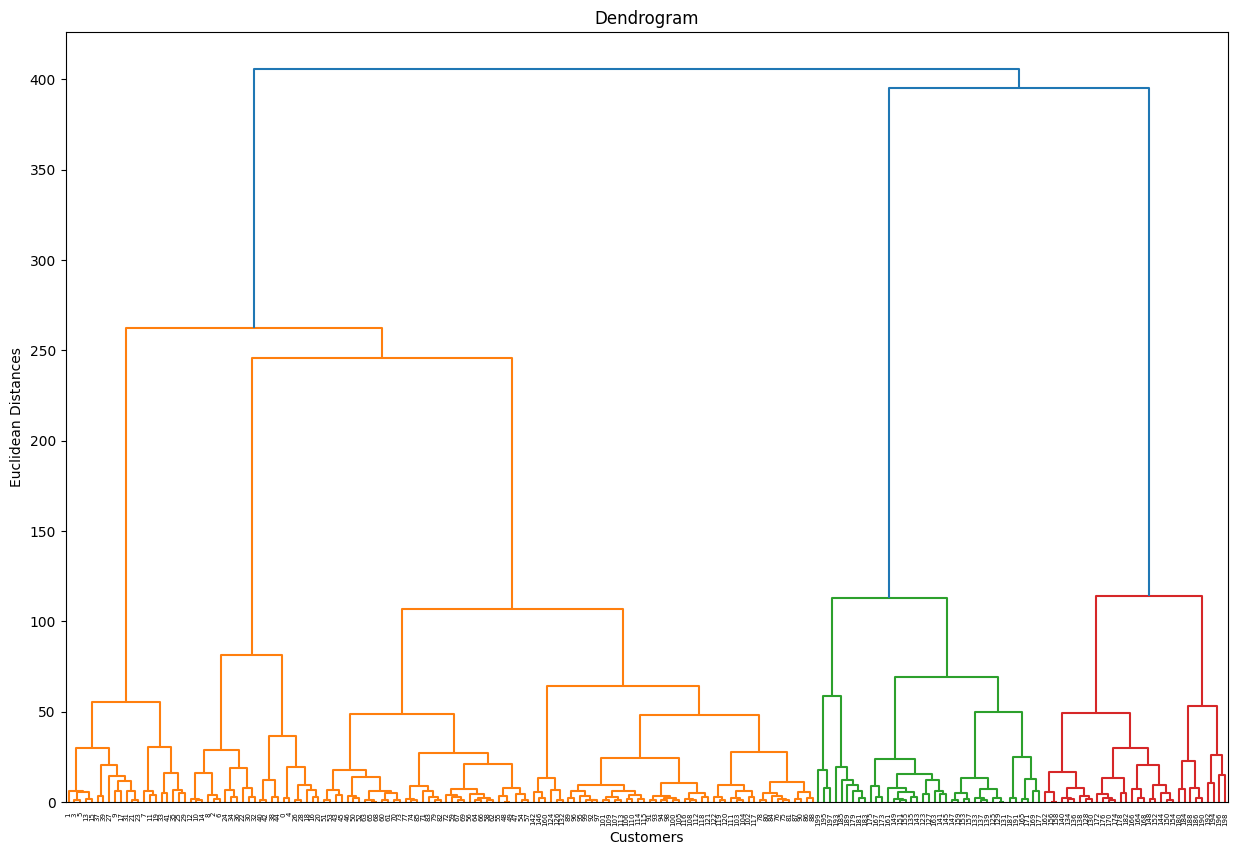

In [11]:
# Using Dendogram to find the optimal number of clusters
dendogram  = hc.dendrogram(hc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

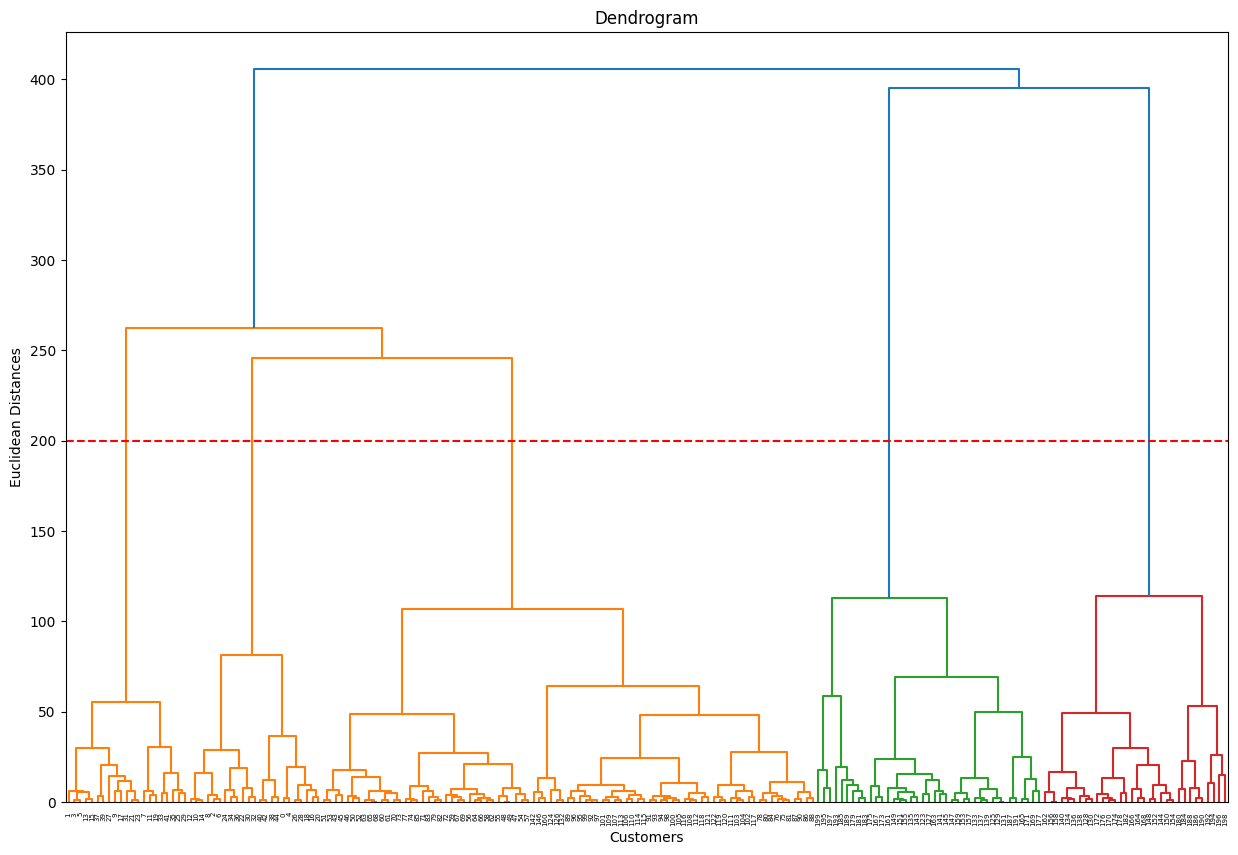

In [12]:
dendogram  = hc.dendrogram(hc.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(200, c='r', linestyle='--')
plt.show()

In [14]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc_Agg = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc_Agg.fit_predict(X)

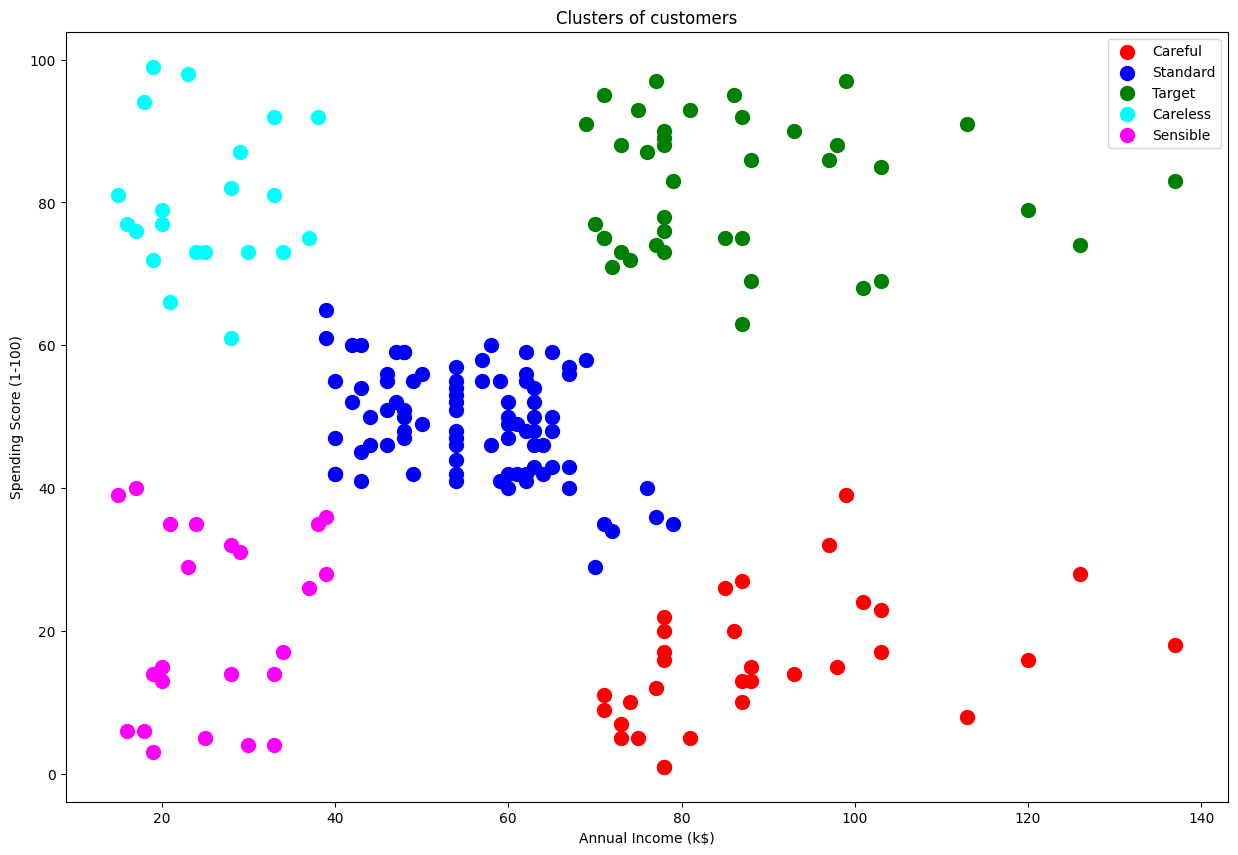

In [15]:
# Visualizing the clusters
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X.iloc[y_hc == 3, 0], X.iloc[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X.iloc[y_hc == 4, 0], X.iloc[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()